In [5]:
import os
import glob
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [6]:
path = '../results'
time_dct = {}

for folder in os.listdir(path):
    for filename in glob.glob(os.path.join(path +"/" + folder + "/result_outputs", 'time.txt')):
        with open(filename, 'r') as f:
            reader = f.readlines()
            time_dct['%s' % folder] = reader

In [7]:
for f in os.listdir(path):
    for ind, elem in enumerate(time_dct[f]):
        time_dct[f][ind] = float(time_dct[f][ind][:-1]) 

No handles with labels found to put in legend.


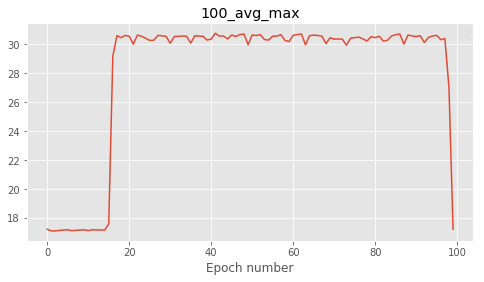

No handles with labels found to put in legend.


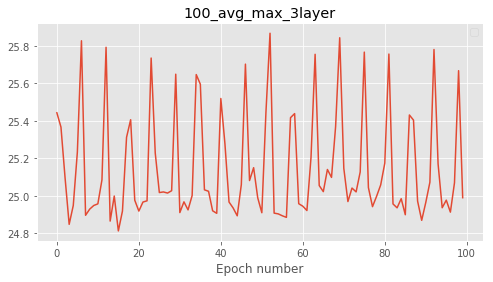

No handles with labels found to put in legend.


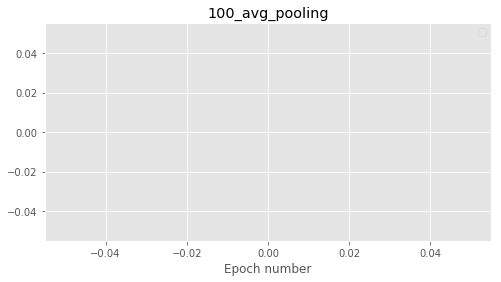

No handles with labels found to put in legend.


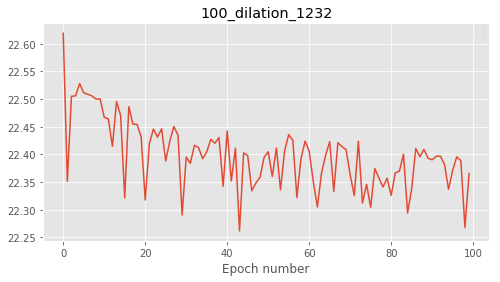

No handles with labels found to put in legend.


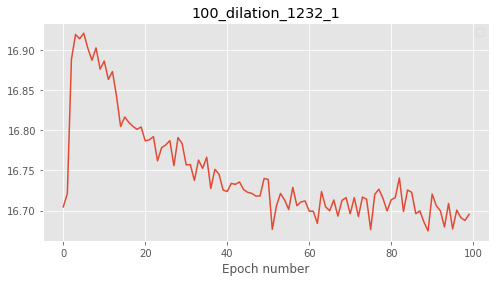

No handles with labels found to put in legend.


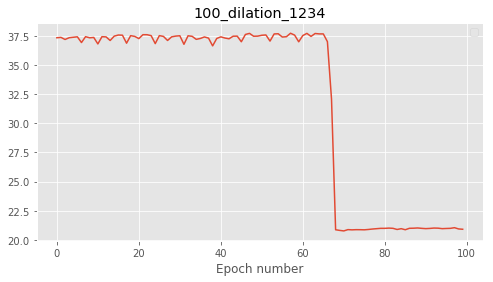

No handles with labels found to put in legend.


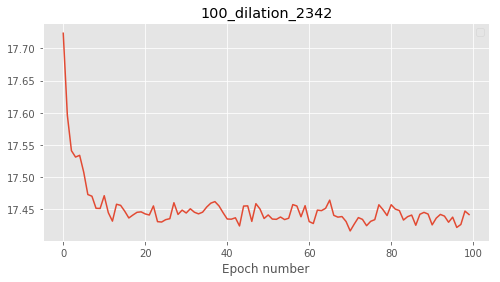

No handles with labels found to put in legend.


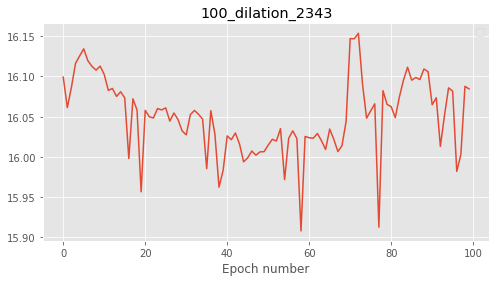

No handles with labels found to put in legend.


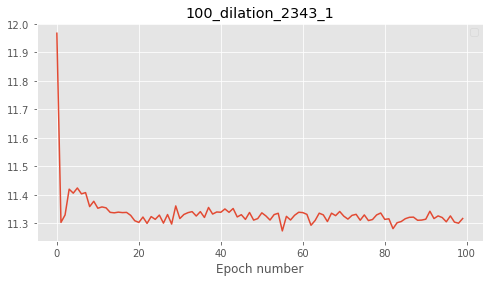

No handles with labels found to put in legend.


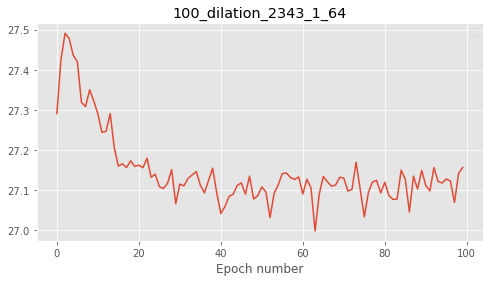

No handles with labels found to put in legend.


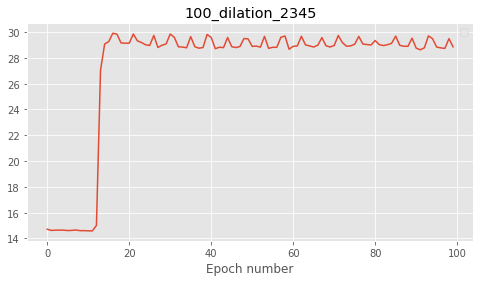

No handles with labels found to put in legend.


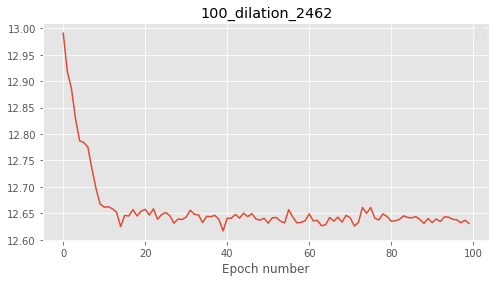

No handles with labels found to put in legend.


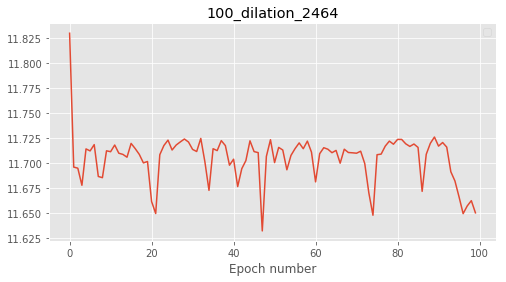

No handles with labels found to put in legend.


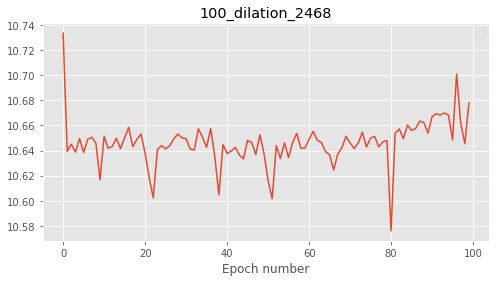

No handles with labels found to put in legend.


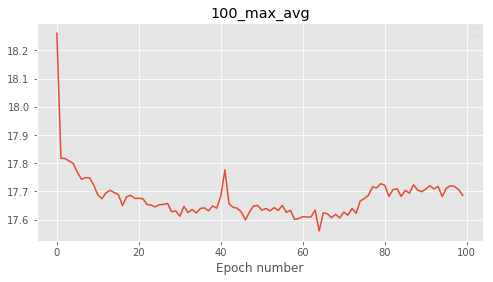

No handles with labels found to put in legend.


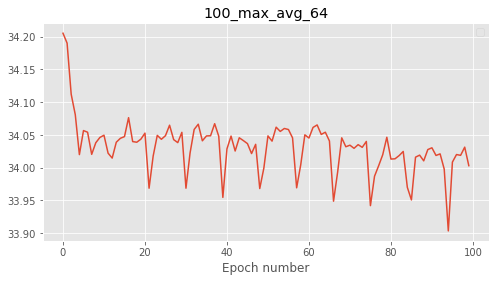

No handles with labels found to put in legend.


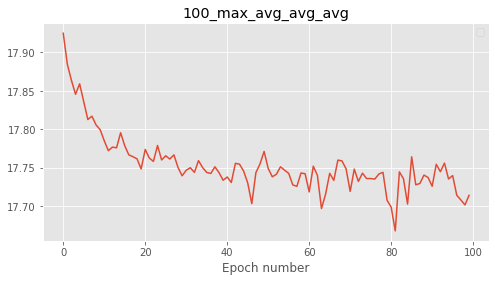

No handles with labels found to put in legend.


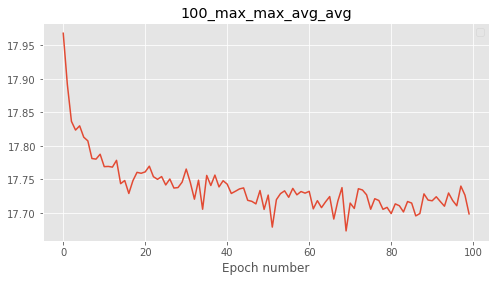

No handles with labels found to put in legend.


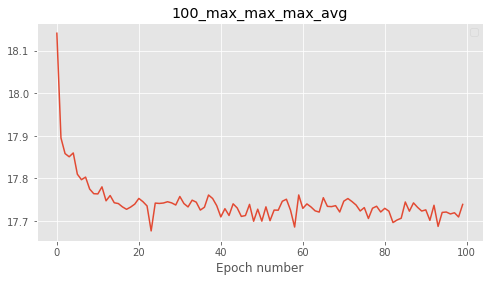

No handles with labels found to put in legend.


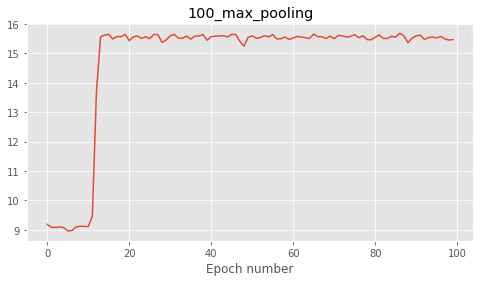

No handles with labels found to put in legend.


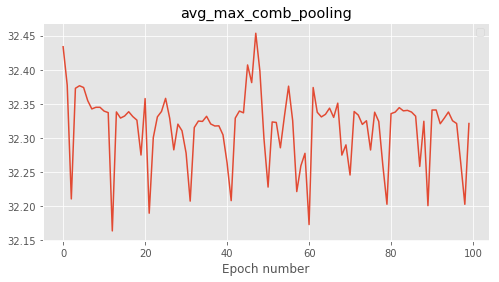

In [8]:
for filename in os.listdir(path): 
    data = time_dct.get(filename)
    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)

    ax_1.plot(np.arange(0, len(data)), data)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')
    plt.title(filename)

    # Plot the change in the validation and training set accuracy over training.
#     fig_2 = plt.figure(figsize=(8, 4))
#     ax_2 = fig_2.add_subplot(111)
#     for sub in np.arange(2):
#         ax_2.plot(np.arange(1, len(data)), plot_data[sub*2+1], label=data[0][sub*2+1])
#     ax_2.plot([1, len(data)], [float(test_data[1][1]), float(test_data[1][1])], label= "{}--{}" .format(test_data[0][1],test_data[1][1])) 
#     ax_2.legend(loc=0)
#     ax_2.set_xlabel('Epoch number')
#     plt.title(filename)
    plt.show()